In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,6)

In [ ]:
df_ab = pd.read_csv("listings.csv").copy()


drop_cols = ['id','name','host_id','host_name','last_review','license']
df_ab.drop(columns=drop_cols, inplace=True)

num_feats = ['price','minimum_nights','number_of_reviews',
             'reviews_per_month','availability_365',
             'calculated_host_listings_count']
X_ab = df_ab[num_feats].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_ab)

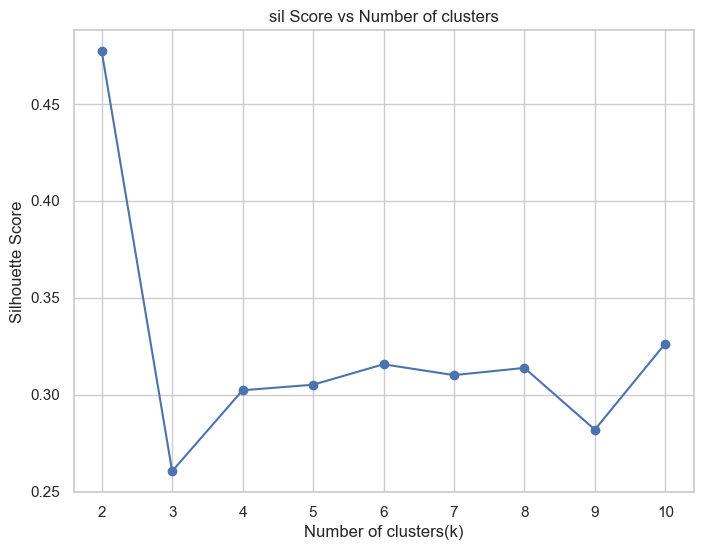

In [ ]:
sil_scores = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.plot(K, sil_scores, marker='o')
plt.title("sil Score vs Number of clusters")
plt.xlabel("Number of clusters(k)")
plt.ylabel("Silhouette Score")
plt.xticks(K)
plt.show()

In [4]:
best_k = 2  # as determined from the plot
km = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = km.fit_predict(X_scaled)

# rerun silhouette for confirmation
sil = silhouette_score(X_scaled, cluster_labels)
print(f"Best k: {best_k}, Silhouette Score: {sil:.4f}")

Best k: 2, Silhouette Score: 0.4772


In [5]:
centroids = scaler.inverse_transform(km.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=num_feats)
print("Cluster centroids:\n", centroid_df)

Cluster centroids:
         price  minimum_nights  number_of_reviews  reviews_per_month  \
0  201.953486        5.954943           63.39610           1.824553   
1  804.160000        7.677419           25.16129           1.211161   

   availability_365  calculated_host_listings_count  
0        206.680229                        5.460883  
1        319.416774                       69.014194  


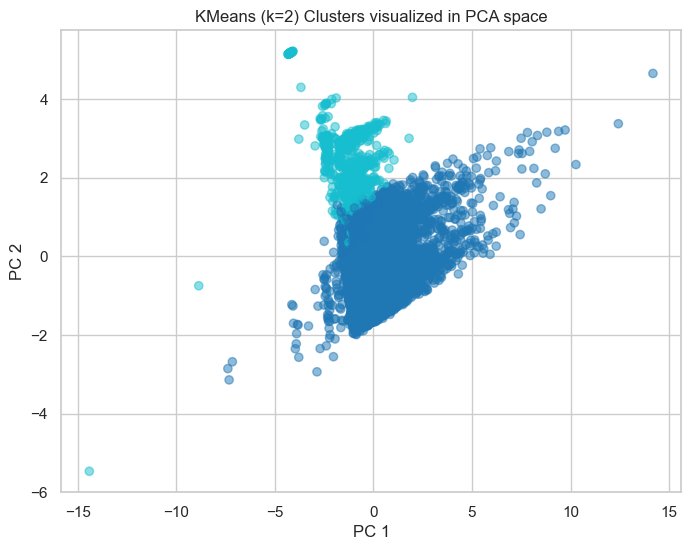

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='tab10', alpha=0.5)
plt.title("KMeans (k=2) Clusters visualized in PCA space")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

used six numeric features (price, minimum_nights, number_of_reviews, reviews_per_month, availability_365, calculated_host_listings_count) and scaled them for clustering.
- Silhouette analysis indicated k=2 clusters had the highest score (0.4772), suggesting two distinct market segments.
- Cluster centroids revealed:
  - Cluster 0 : Lowerpriced listings (~$202), moderate minimum nights, higher review activity, moderate availability.
  - Cluster 1: Higher priced listings (~$804), slightly higher minimum nights, fewer reviews, greater availability.
- PCA visualization shows clear separation between these two groups, confirming cluster validity.
- EDA insight: review metrics and availability patterns drive cluster separation more strongly than price alone.
- Overfitting control: Using silhouette score for k selection prevented choosing too many or too few clusters.

